In [1]:
img_width, img_height = 500, 500
input_shape = (img_width, img_height, 1)
batch_size = 32
output_classes = 5

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,
                                     shear_range=0.2,
                                     zoom_range=0.2)
test_generator = ImageDataGenerator(rescale=1/255)


train_data = train_generator.flow_from_directory(
    directory="./dataset/data1/training_set/",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"
)
test_data = train_generator.flow_from_directory(
    directory="./dataset/data1/test_set/",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 177 images belonging to 5 classes.
Found 44 images belonging to 5 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten

model = Sequential()

# Block 1
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from Block 2
model.add(Flatten())

# Block 3
model.add(Dense(120, activation='relu'))

# Block 4
model.add(Dense(84, activation='relu'))

# Output layer
model.add(Dense(output_classes, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 6)       156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 244, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 16)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 120)               2

In [5]:
from keras import optimizers
model.compile(
    optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
epochs_range = 100
# Train the model
history = model.fit(train_data, batch_size=batch_size, 
                    epochs=epochs_range,
                    validation_data=test_data)

Epoch 1/100
6/6 [==============================] - 26s 4s/step - loss: 1.7844 - accuracy: 0.2712 - val_loss: 1.6019 - val_accuracy: 0.4091
Epoch 2/100
6/6 [==============================] - 24s 4s/step - loss: 1.6160 - accuracy: 0.3220 - val_loss: 1.5814 - val_accuracy: 0.4091
Epoch 3/100
6/6 [==============================] - 22s 4s/step - loss: 1.4999 - accuracy: 0.4294 - val_loss: 1.5469 - val_accuracy: 0.4091
Epoch 4/100
6/6 [==============================] - 22s 3s/step - loss: 1.5216 - accuracy: 0.4011 - val_loss: 1.6012 - val_accuracy: 0.4091
Epoch 5/100
6/6 [==============================] - 21s 3s/step - loss: 1.5001 - accuracy: 0.4294 - val_loss: 1.4618 - val_accuracy: 0.4091
Epoch 6/100
6/6 [==============================] - 20s 3s/step - loss: 1.4403 - accuracy: 0.4350 - val_loss: 1.4539 - val_accuracy: 0.4091
Epoch 7/100
6/6 [==============================] - 20s 3s/step - loss: 1.4060 - accuracy: 0.4294 - val_loss: 1.4171 - val_accuracy: 0.4091
Epoch 8/100
6/6 [==========

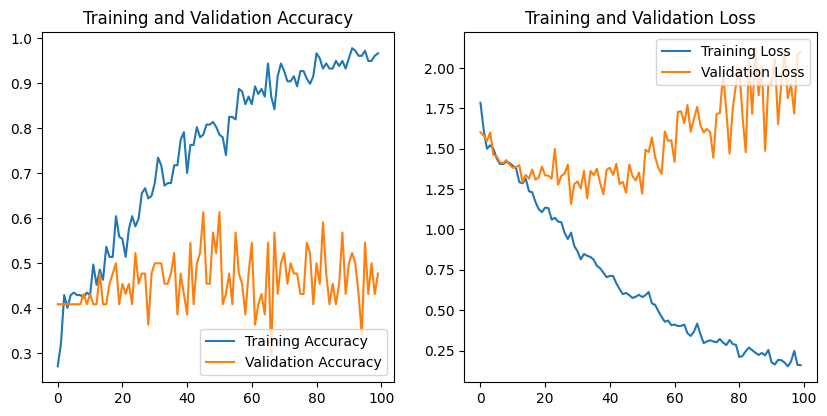

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Save the model as model.h5
# model.save('model_lenet.h5')
# Print the class indices 
classes = train_data.class_indices
classes

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

In [10]:
# from keras.models import load_model
# # Load the model
# model = load_model('./model_lenet.h5')

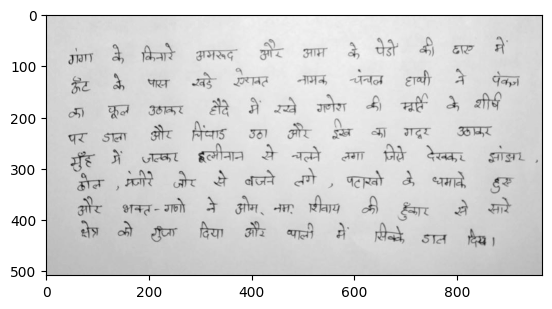

(508, 967)


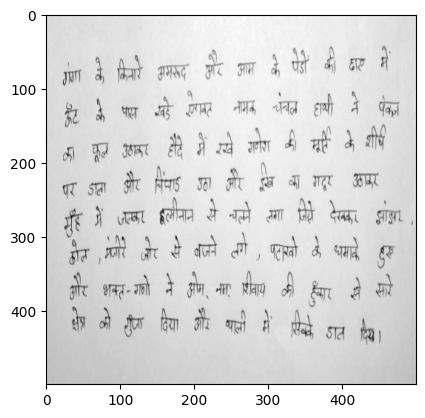

In [34]:
import cv2
import numpy as np

org_img = cv2.imread("./dataset/data1/test_set/Openness/24.JPG", cv2.IMREAD_GRAYSCALE)
# ret, test_img = cv2.threshold(org_img, 150, 255, cv2.THRESH_BINARY)
# test_img = cv2.dilate(test_img, np.ones((3, 3), np.uint8), iterations=0)
# test_img = cv2.erode(test_img, np.ones((5, 5), np.uint8), iterations=5)
plt.imshow(org_img, cmap="gray")
plt.show()
print(org_img.shape)
test_img = cv2.resize(org_img, (500, 500))
plt.imshow(test_img, cmap="gray")
test_input = test_img.reshape((1, 500, 500, 1))

In [13]:
classes_dict = {
    0: 'Agreeableness',
    1: 'Conscientiousness',
    2: 'Extraversion',
    3: 'Neuroticism',
    4: 'Openness'
}
class_keys = [str(i) for i in classes.keys()]

In [35]:
man_pred = model.predict(test_input)
max_pred = man_pred.max(1)
pred_key = int(np.where(man_pred == max_pred)[1])
print(f"Prediction key: {pred_key}")
# folder_id = int(list(train_ds.class_indices.keys())[list(train_ds.class_indices.values()).index(pred_key)])
# folder_id = int(class_keys[pred_key])
# print(f"Folder id: {folder_id}")
print(f"Predicted letter: {classes_dict[pred_key]}")

1/1 [==============================] - 0s 64ms/step
Prediction key: 4
Predicted letter: Openness
